## Final Project Submission

Please fill out:
* Student name: Eric Cusick
* Student pace: Full time
* Scheduled project review date/time: 
* Instructor name: James Irving
* Blog post URL: https://ericusick.github.io/osemn_framework


### Overview

The goal of this project is to get an accurate data from the "kc_house_data.csv" file using linear regression model. When working through this final project we need to apply what we had learn from Module 2 of the course. Using modeling and work through the OSEMN Framework as a reference. The target audience are the sellers of the house looking to maximize their house's value. 

## OBTAIN


> Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')

> Loading in the dataset for the project and make sure it loaded correctly

In [2]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## SCRUBBING

### Previewing the Data

 >Checking Data Types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
# Both date and sqft_basement are object

>Checking out 'sqft_basement' column because it is listed as an object

In [5]:
df.sqft_basement.unique()[:5]

array(['0.0', '400.0', '910.0', '1530.0', '?'], dtype=object)

>Checking out the 'price' column

In [6]:
df.price.unique()[:5]

array([221900., 538000., 180000., 604000., 510000.])

In [7]:
# It's a float dtype but ended up checking to make sure there was no weird 
# symbols

>Checking out the waterfront due to missing rows

In [8]:
df.waterfront.unique()

array([nan,  0.,  1.])

>Checking to see if there is any extraneous values

In [9]:
for col in df:
    print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n')

id 
 795000620     0.000139
1825069031    0.000093
2019200220    0.000093
7129304540    0.000093
1781500435    0.000093
Name: id, dtype: float64 


date 
 6/23/2014    0.006575
6/25/2014    0.006066
6/26/2014    0.006066
7/8/2014     0.005880
4/27/2015    0.005834
Name: date, dtype: float64 


price 
 350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
Name: price, dtype: float64 


bedrooms 
 3    0.454878
4    0.318655
2    0.127796
5    0.074131
6    0.012594
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.248970
1.00    0.178312
1.75    0.141131
2.25    0.094782
2.00    0.089364
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006390
1400    0.006251
1440    0.006158
1660    0.005973
1010    0.005973
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016576
6000    0.013428
4000    0.011622
7200    0.010187
7500    0.005510
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.494189
2.0    0.381303
1.5    

In [10]:
# Columns that have extraneous values: sqft_basement

>Checking for missing values

In [11]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [12]:
# Waterfront, yr_renovated, and view are missing some values

# May be a good idea to fill in the view with the mode or remove the rows
# altogether

# Waterfront nan should be mark with a 0 under the assumption the house is not
# on a waterfront

# yr_renovated needs to be transform into a numeric boolean value

>Using .describe() to take a look at some of the min and max values in each columns

In [13]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [14]:
# 'sqft_basement' and 'date' columns are missing due to being an object
# we would want to have the sqft_basement to be an integer/float
# the 'date' can be left alone as it is a categorical data

### Cleaning/Fixing Data

>Converting the 'sqft_basement' dtype from an object to a number

In [15]:
df.sqft_basement.head(10)

0       0.0
1     400.0
2       0.0
3     910.0
4       0.0
5    1530.0
6         ?
7       0.0
8     730.0
9       0.0
Name: sqft_basement, dtype: object

In [16]:
# Needs to fix it into a mean!!!!!!!
df.sqft_basement = df.sqft_basement.replace('?', np.nan)

In [17]:
df.sqft_basement.head(10)

0       0.0
1     400.0
2       0.0
3     910.0
4       0.0
5    1530.0
6       NaN
7       0.0
8     730.0
9       0.0
Name: sqft_basement, dtype: object

In [18]:
df.sqft_basement = df.sqft_basement.astype('float64')
# not a perament change yet

In [19]:
df.sqft_basement = df.sqft_basement.fillna(np.nanmedian(df.sqft_basement))

In [20]:
df.sqft_basement.head(10)

0       0.0
1     400.0
2       0.0
3     910.0
4       0.0
5    1530.0
6       0.0
7       0.0
8     730.0
9       0.0
Name: sqft_basement, dtype: float64

>Taking care of missing values in the dataset

>Replace all missing value in 'waterfront' to a 0 assuming that the house is not on a waterfront

In [21]:
df.waterfront = df.waterfront.fillna(0)

In [22]:
df.waterfront.unique()

array([0., 1.])

>Filling in the missing values for 'view' column with a 0

In [23]:
df.view = df.view.fillna(0)

In [24]:
df.view.unique()

array([0., 3., 4., 2., 1.])

>Filling in the missing values for 'yr_renovated' with a 0 assuming that they have not been renovated

In [25]:
df.yr_renovated = df.yr_renovated.fillna(0)

In [26]:
df.yr_renovated.unique()

array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [27]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [28]:
# All missing values has been replaced

>Checking the .describe() for changes

In [29]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,285.716581,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,439.819830,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [30]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

>Converting the date column to a datetime format to create a new column for months

In [31]:
df.date = pd.to_datetime(df.date)

In [32]:
df['month'] = df.date.dt.month

>Checking to see if the new columns 'month' were added to the dataset

In [33]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2


>Dropping the 'date' column, we're only interested in the months

In [34]:
df = df.drop('date', axis=1)

>Converting the datatype in 'yr_renovated' to a boolean value

In [35]:
df['yr_renovated'] = df['yr_renovated'].astype('bool')

In [36]:
df['yr_renovated'].value_counts()

False    20853
True       744
Name: yr_renovated, dtype: int64

In [37]:
df['yr_renovated'] = df['yr_renovated'].astype('int')

In [38]:
df['yr_renovated'].value_counts()

0    20853
1      744
Name: yr_renovated, dtype: int64

### One-Hot Encoding Categorical Columns

In [39]:
# Using columns 'condition', 'grade', 'zipcode' to check out the number of 
# unique values in each columns to see what is worth OHE

df[['condition', 'grade', 'zipcode']].nunique()

condition     5
grade        11
zipcode      70
dtype: int64

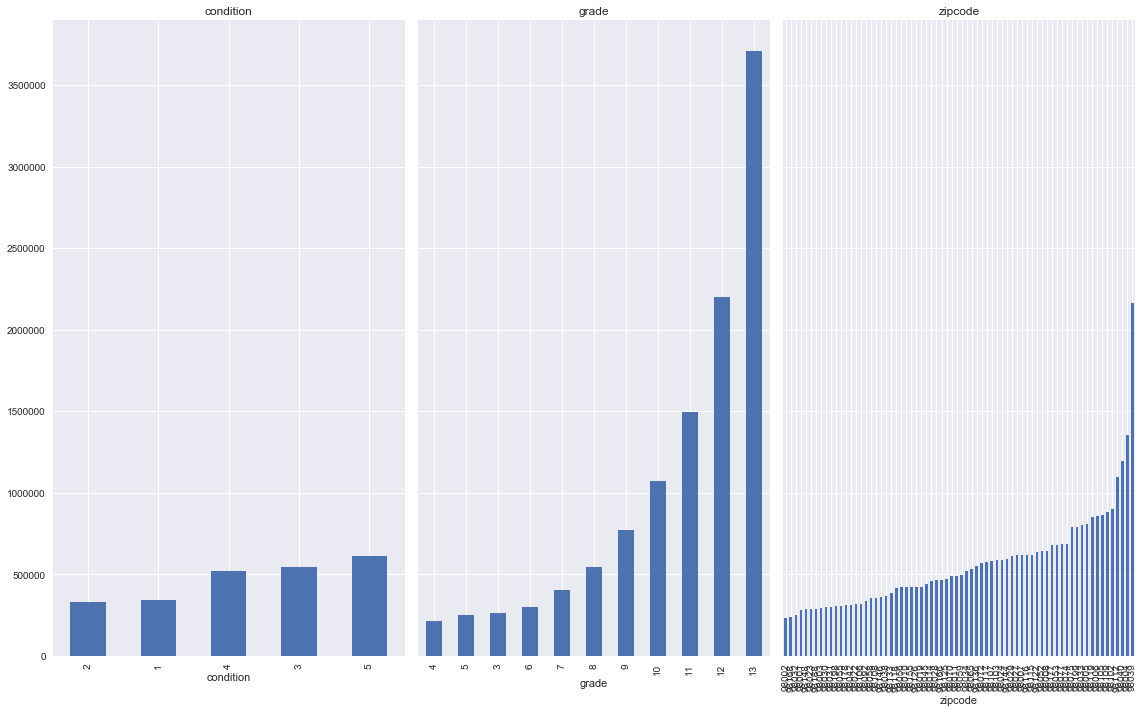

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,10), sharey=True)

feats = ['condition', 'grade', 'zipcode']

for col, ax in zip(feats, axes.flatten()):
    (df.groupby(col)               
         .mean()['price']        
         .sort_values()              
         .plot
         .bar(ax=ax))                
    
    ax.set_title(col)                
fig.tight_layout()

In [41]:
df_=df.copy()

In [42]:
df = pd.get_dummies(df_, columns = feats, drop_first=True)
df
# df_preprocessed = df.drop(feats, axis=1)
# df_preprocessed = pd.concat([df_preprocessed, dummies], axis=1)
# df_preprocessed.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,1180,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,2170,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,770,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,1050,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,1680,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,1530,...,0,0,0,0,0,0,0,0,0,0
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,2310,...,1,0,0,0,0,0,0,0,0,0
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,1020,...,0,0,0,0,0,0,0,0,0,0
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,1600,...,0,0,0,0,0,0,0,0,0,0


### Checking for Multicollinearity 

>Investigating whether multicollinearity exists in 'sqft' columns

In [43]:
sqft_col = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 
            'sqft_living15', 'sqft_lot15']
for col in sqft_col:
    t_f = col in df.columns
    print(f"{col}={t_f}")

sqft_living=True
sqft_lot=True
sqft_above=True
sqft_basement=True
sqft_living15=True
sqft_lot15=True


In [44]:
df[sqft_col].corr()

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
sqft_living,1.000000,0.173453,0.876448,0.428660,0.756402,0.184342
sqft_lot,0.173453,1.000000,0.184139,0.015031,0.144763,0.718204
sqft_above,0.876448,0.184139,1.000000,-0.051175,0.731767,0.195077
sqft_basement,0.428660,0.015031,-0.051175,1.000000,0.199288,0.015885
sqft_living15,0.756402,0.144763,0.731767,0.199288,1.000000,0.183515
sqft_lot15,0.184342,0.718204,0.195077,0.015885,0.183515,1.000000


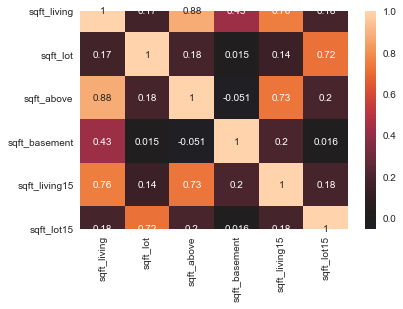

In [45]:
sns.heatmap(df[sqft_col].corr(), center=0, annot=True);

In [46]:
# There seems to be a significant correlation between:
# 'sqft_living' and 'sqft_above'
# 'sqft_living' and 'sqft_living15' 
# 'sqft_lot' and 'sqft_lot15'
# 'sqft_above' and 'sqft_living15'

# I would eliminate the columns 'sqft_above', 'sqft_living15', 'sqft_lot15'

>Removing Columns from the Dataset

In [47]:
df = df.drop(['view', 'lat', 'long', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'id'], axis=1)

In [48]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_basement,yr_built,yr_renovated,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,1955,0,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,400.0,1951,1,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,1933,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,910.0,1965,0,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,1987,0,...,0,0,0,0,0,0,0,0,0,0


## EXPLORING

### Quick Overview

>Histogram over each columns

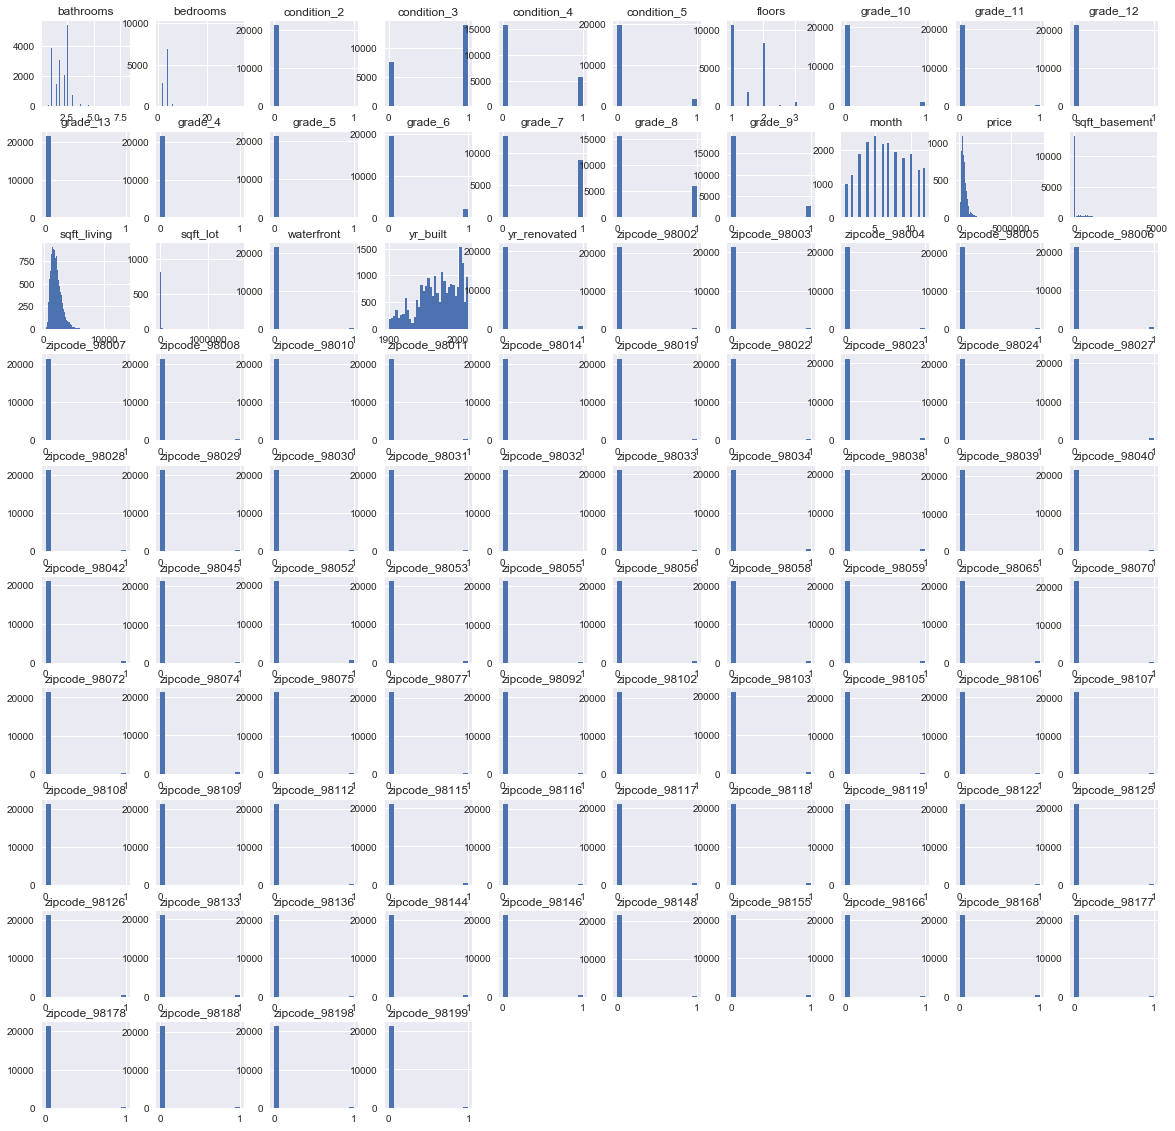

In [49]:
df.hist(bins = 'auto', figsize = (20,20));

### Exploring For Linearity


>Here we're just taking a peek at potentially important
correlation using 'price' based off of assumption and observation

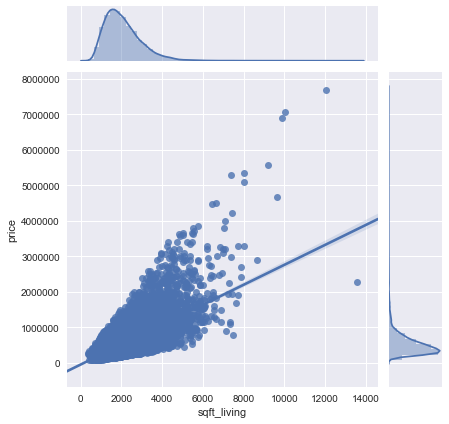

In [50]:
sns.jointplot('sqft_living', 'price', data=df, kind='reg'); 

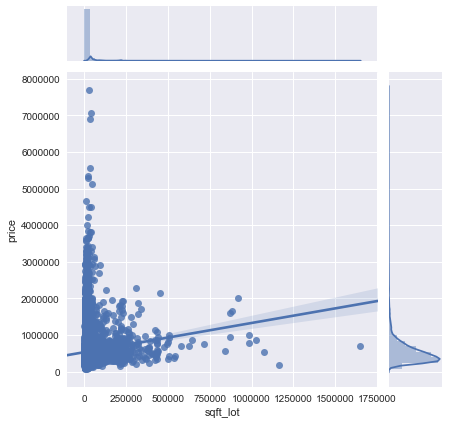

In [51]:
sns.jointplot('sqft_lot', 'price', data=df, kind='reg');

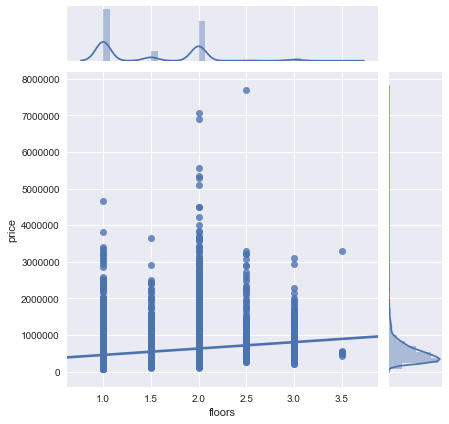

In [52]:
sns.jointplot('floors', 'price', data=df, kind='reg');

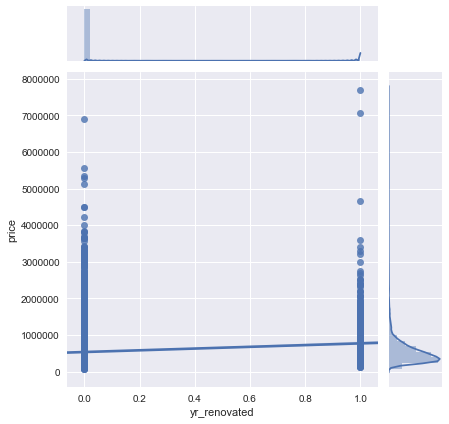

In [53]:
sns.jointplot('yr_renovated', 'price', data=df, kind='reg');

>I've found the website containing information retaining to the grade and condition criteria set by King County https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r

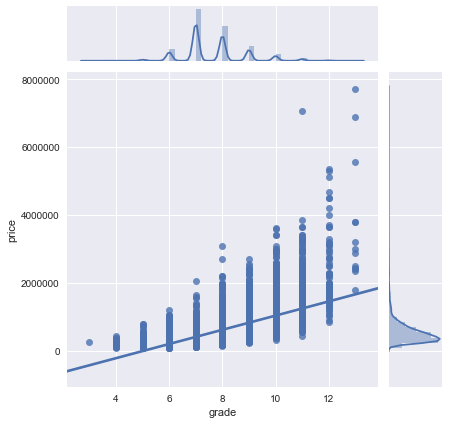

In [54]:
sns.jointplot('grade', 'price', data=df_, kind='reg');

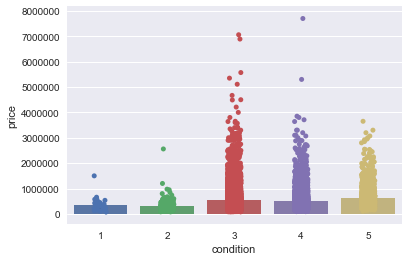

In [55]:
sns.stripplot('condition', 'price', data=df_);
sns.barplot('condition', 'price', data=df_);

1         AxesSubplot(0.1,0.679412;0.363636x0.220588)
2    AxesSubplot(0.536364,0.679412;0.363636x0.220588)
3         AxesSubplot(0.1,0.414706;0.363636x0.220588)
4    AxesSubplot(0.536364,0.414706;0.363636x0.220588)
5             AxesSubplot(0.1,0.15;0.363636x0.220588)
dtype: object

<Figure size 1080x1080 with 0 Axes>

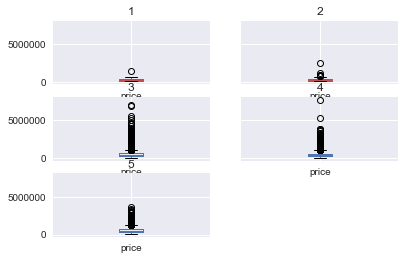

In [56]:
plt.figure(figsize = (15, 15))
df_.groupby('condition').boxplot(column = 'price')

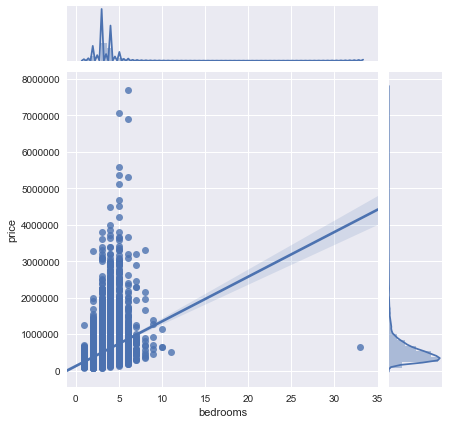

In [57]:
sns.jointplot('bedrooms', 'price', data=df, kind='reg');

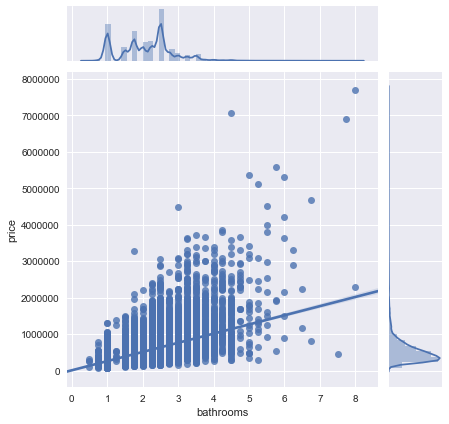

In [58]:
sns.jointplot('bathrooms', 'price', data=df, kind='reg');

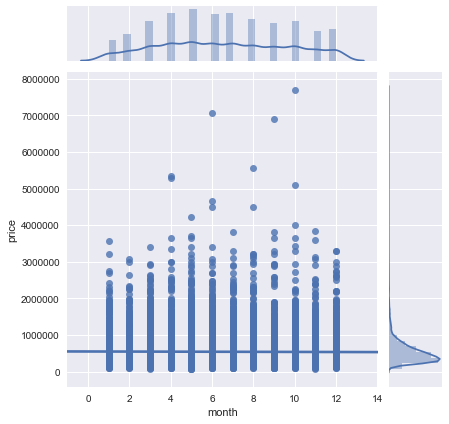

In [59]:
sns.jointplot('month', 'price', data=df, kind='reg');

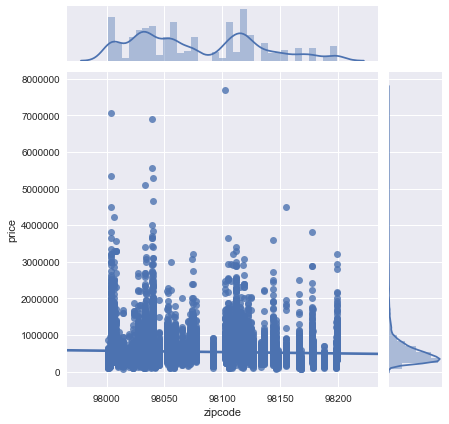

In [60]:
sns.jointplot('zipcode', 'price', data=df_, kind='reg');

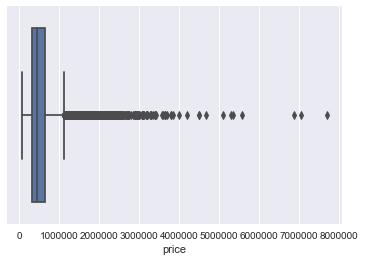

In [61]:
sns.boxplot(df['price'])

98001        AxesSubplot(0.1,0.829245;0.0851064x0.0707547)
98002    AxesSubplot(0.202128,0.829245;0.0851064x0.0707...
98003    AxesSubplot(0.304255,0.829245;0.0851064x0.0707...
98004    AxesSubplot(0.406383,0.829245;0.0851064x0.0707...
98005    AxesSubplot(0.508511,0.829245;0.0851064x0.0707...
                               ...                        
98177       AxesSubplot(0.202128,0.15;0.0851064x0.0707547)
98178       AxesSubplot(0.304255,0.15;0.0851064x0.0707547)
98188       AxesSubplot(0.406383,0.15;0.0851064x0.0707547)
98198       AxesSubplot(0.508511,0.15;0.0851064x0.0707547)
98199       AxesSubplot(0.610638,0.15;0.0851064x0.0707547)
Length: 70, dtype: object

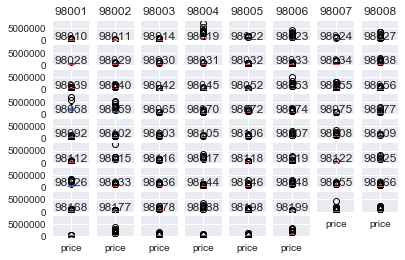

In [62]:
df_.groupby('zipcode').boxplot(column = 'price')

## MODEL

### Setting Up the Data for Modeling

Importing packages for modeling

In [63]:
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

>Haven't remove outliers yet

In [64]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_basement,yr_built,yr_renovated,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,1955,0,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,400.0,1951,1,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,1933,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,910.0,1965,0,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,1987,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
# Checking to see if there is any spacing, symbols, etc. in the column's name
list(df.columns)

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'month',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'grade_10',
 'grade_11',
 'grade_12',
 'grade_13',
 'zipcode_98002',
 'zipcode_98003',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98033',
 'zipcode_98034',
 'zipcode_98038',
 'zipcode_98039',
 'zipcode_98040',
 'zipcode_98042',
 'zipcode_98045',
 'zipcode_98052',
 'zipcode_98053',
 'zipcode_98055',
 'zipcode_98056',
 'zipcode_98058',
 'zipcode_98059',
 'zipcode_98065',
 'zipcode_98070',
 'zipcode_98072',
 'zipcode_9807

In [66]:
# Defining the problem
outcome = 'price'
x_cols = list(df.columns)
x_cols.remove(outcome)

In [67]:
train, test = train_test_split(df)

In [68]:
print(len(train), len(test))
train.head()

16197 5400


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_basement,yr_built,yr_renovated,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
16802,305000.0,3,2.0,1830,10873,1.0,0.0,0.0,1989,0,...,0,0,0,0,0,0,0,0,0,0
525,727500.0,2,2.0,1240,9119,1.0,0.0,0.0,1952,0,...,0,0,0,0,0,0,0,0,0,0
2222,275000.0,3,2.5,1600,7000,2.0,0.0,0.0,1993,0,...,0,0,0,0,0,0,0,0,0,0
8780,210000.0,3,2.0,960,9380,1.0,0.0,0.0,1949,0,...,1,0,0,0,0,0,0,0,0,0
12419,595000.0,3,2.5,2250,8300,2.0,0.0,0.0,2003,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     835.4
Date:                Fri, 18 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:21:40   Log-Likelihood:            -2.1604e+05
No. Observations:               16197   AIC:                         4.323e+05
Df Residuals:                   16104   BIC:                         4.330e+05
Df Model:                          92                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.246e+06   1.31e+05      9.542      0.000     9.9e+05     1.5e+06
bedrooms       -1.86e+04   1780.720    -10.444      0.000   -2.21e+04   -1.51e+04
bathrooms      2.689e+04   2861.049      9.400      0.000    2.13e+04    3.25e+04
sqft_living     170.9509      3.171     53.914      0.000     164.736     177.166
sqft_lot          0.1818      0.031      5.921      0.000       0.122       0.242
floors        -2.742e+04   3429.443     -7.997      0.000   -3.41e+04   -2.07e+04
waterfront      8.05e+05   1.55e+04     52.075      0.000    7.75e+05    8.35e+05
sqft_basement   -32.3862      3.915     -8.271      0.000     -40.061     -24.711
yr_built       -578.7549     70.688     -8.187      0.000    -717.311    -440.199
yr_renovated   5.779e+04   6937.594      8.330      0.000    4.42e+04    7.14e+04
month         -3150.6512    381.167     -8.266      0.000   -3897.781   -2403.522
condition_2    1.295e+05   4.01e+04      3.227      0.001    5.08e+04    2.08e+05
condition_3    1.536e+05    3.8e+04      4.044      0.000    7.92e+04    2.28e+05
condition_4    1.795e+05    3.8e+04      4.726      0.000    1.05e+05    2.54e+05
condition_5    2.178e+05   3.82e+04      5.708      0.000    1.43e+05    2.93e+05
grade_4       -2.195e+05   3.08e+04     -7.134      0.000    -2.8e+05   -1.59e+05
grade_5        -2.64e+05   1.66e+04    -15.902      0.000   -2.97e+05   -2.31e+05
grade_6       -2.664e+05   1.43e+04    -18.598      0.000   -2.94e+05   -2.38e+05
grade_7        -2.57e+05   1.46e+04    -17.653      0.000   -2.86e+05   -2.28e+05
grade_8       -2.191e+05   1.49e+04    -14.682      0.000   -2.48e+05    -1.9e+05
grade_9       -1.287e+05   1.54e+04     -8.358      0.000   -1.59e+05   -9.85e+04
grade_10      -6437.1322    1.6e+04     -0.403      0.687   -3.78e+04    2.49e+04
grade_11       2.257e+05   1.76e+04     12.838      0.000    1.91e+05     2.6e+05
grade_12       5.649e+05   2.41e+04     23.467      0.000    5.18e+05    6.12e+05
grade_13       1.816e+06   4.72e+04     38.439      0.000    1.72e+06    1.91e+06
zipcode_98002  5938.5732   1.55e+04      0.383      0.702   -2.45e+04    3.63e+04
zipcode_98003 -4948.7621   1.39e+04     -0.356      0.722   -3.22e+04    2.23e+04
zipcode_98004  7.609e+05   1.35e+04     56.476      0.000    7.35e+05    7.87e+05
zipcode_98005  2.972e+05   1.63e+04     18.271      0.000    2.65e+05    3.29e+05
zipcode_98006  2.457e+05   1.22e+04     20.139      0.000    2.22e+05     2.7e+05
zipcode_98007  2.389e+05   1.73e+04     13.845      0.000    2.05e+05    2.73e+05
zipcode_98008  2.652e+05   1.38e+04     19.198      0.000    2.38e+05    2.92e+05
zipcode_98010   5.63e+04   2.02e+04      2.793      0.005    1.68e+04    9.58e+04
zipcode_98011  1.292e+05   1.54e+04      8.380      0.000     9.9e+04    1.59e+05
zipcode_98014  9.381e+04   1.84e+04      5.092   

>Removing uninfluential features

In [70]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

94 82
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,1.246e+06,1.31e+05,9.542,0.0,9.9e+05,1.5e+06
bedrooms,-1.86e+04,1780.720,-10.444,0.0,-2.21e+04,-1.51e+04
bathrooms,2.689e+04,2861.049,9.400,0.0,2.13e+04,3.25e+04
sqft_living,170.9509,3.171,53.914,0.0,164.736,177.166
sqft_lot,0.1818,0.031,5.921,0.0,0.122,0.242


>Taking a look at the OLS to see the changes and if the R-squared value is still at a healthy number

In [71]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     937.3
Date:                Fri, 18 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:21:41   Log-Likelihood:            -2.1605e+05
No. Observations:               16197   AIC:                         4.323e+05
Df Residuals:                   16114   BIC:                         4.329e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.261e+06   1.44e+05      8.777      0.000    9.79e+05    1.54e+06
bedrooms      -1.864e+04   1778.224    -10.485      0.000   -2.21e+04   -1.52e+04
bathrooms       2.69e+04   2858.886      9.410      0.000    2.13e+04    3.25e+04
sqft_living     170.8488      3.168     53.932      0.000     164.639     177.058
sqft_lot          0.1859      0.030      6.186      0.000       0.127       0.245
floors        -2.737e+04   3427.090     -7.986      0.000   -3.41e+04   -2.07e+04
waterfront      8.07e+05   1.53e+04     52.875      0.000    7.77e+05    8.37e+05
sqft_basement   -32.1622      3.907     -8.232      0.000     -39.820     -24.504
yr_built       -586.3214     70.395     -8.329      0.000    -724.304    -448.339
yr_renovated   5.786e+04   6928.710      8.351      0.000    4.43e+04    7.14e+04
month         -3147.8112    381.016     -8.262      0.000   -3894.645   -2400.978
condition_2    1.301e+05   4.01e+04      3.243      0.001    5.15e+04    2.09e+05
condition_3    1.544e+05    3.8e+04      4.065      0.000    7.99e+04    2.29e+05
condition_4      1.8e+05    3.8e+04      4.741      0.000    1.06e+05    2.54e+05
condition_5    2.186e+05   3.81e+04      5.730      0.000    1.44e+05    2.93e+05
grade_4       -2.122e+05   3.23e+04     -6.563      0.000   -2.76e+05   -1.49e+05
grade_5       -2.573e+05   1.43e+04    -18.044      0.000   -2.85e+05   -2.29e+05
grade_6       -2.596e+05   9116.808    -28.477      0.000   -2.77e+05   -2.42e+05
grade_7       -2.504e+05   7493.488    -33.421      0.000   -2.65e+05   -2.36e+05
grade_8       -2.127e+05   6745.075    -31.533      0.000   -2.26e+05   -1.99e+05
grade_9       -1.222e+05   6552.386    -18.644      0.000   -1.35e+05   -1.09e+05
grade_11       2.322e+05   1.04e+04     22.347      0.000    2.12e+05    2.53e+05
grade_12       5.714e+05   2.04e+04     28.009      0.000    5.31e+05    6.11e+05
grade_13       1.823e+06   4.92e+04     37.050      0.000    1.73e+06    1.92e+06
zipcode_98004  7.535e+05   1.04e+04     72.320      0.000    7.33e+05    7.74e+05
zipcode_98005  2.897e+05   1.38e+04     20.953      0.000    2.63e+05    3.17e+05
zipcode_98006  2.383e+05   8703.580     27.379      0.000    2.21e+05    2.55e+05
zipcode_98007  2.314e+05    1.5e+04     15.440      0.000    2.02e+05    2.61e+05
zipcode_98008  2.577e+05   1.08e+04     23.756      0.000    2.36e+05    2.79e+05
zipcode_98010  4.862e+04   1.82e+04      2.665      0.008    1.29e+04    8.44e+04
zipcode_98011  1.217e+05   1.29e+04      9.470      0.000    9.65e+04    1.47e+05
zipcode_98014  8.597e+04   1.63e+04      5.270      0.000     5.4e+04    1.18e+05
zipcode_98019  8.986e+04   1.31e+04      6.848      0.000    6.41e+04    1.16e+05
zipcode_98023 -3.952e+04   8620.146     -4.585      0.000   -5.64e+04   -2.26e+04
zipcode_98024  1.278e+05    1.9e+04      6.732   

In [72]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [73]:
model.params.sort_values().tail(20)

zipcode_98116    302301.78008
zipcode_98117    307946.14656
zipcode_98107    321414.71209
zipcode_98115    322815.74712
zipcode_98103    325416.18485
zipcode_98122    331965.79236
zipcode_98033    347573.97474
zipcode_98199    384954.34276
zipcode_98105    459889.07050
zipcode_98102    464030.85227
zipcode_98119    476440.09726
zipcode_98040    498150.00952
zipcode_98109    506035.04698
grade_12         571356.05672
zipcode_98112    590211.88689
zipcode_98004    753487.53297
waterfront       806979.77395
zipcode_98039   1162457.90318
Intercept       1261061.16364
grade_13        1822734.78375
dtype: float64

In [74]:
model.params['yr_renovated']

57859.13100050982

In [75]:
model.pvalues[model.pvalues > 0.05]

zipcode_98058   0.05606
dtype: float64

>The R-squared seems to be unchanged

In [76]:
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     937.3
Date:                Fri, 18 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:21:41   Log-Likelihood:            -2.1605e+05
No. Observations:               16197   AIC:                         4.323e+05
Df Residuals:                   16114   BIC:                         4.329e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.261e+06   1.44e+05      8.777      0.000    9.79e+05    1.54e+06
bedrooms      -1.864e+04   1778.224    -10.485      0.000   -2.21e+04   -1.52e+04
bathrooms       2.69e+04   2858.886      9.410      0.000    2.13e+04    3.25e+04
sqft_living     170.8488      3.168     53.932      0.000     164.639     177.058
sqft_lot          0.1859      0.030      6.186      0.000       0.127       0.245
floors        -2.737e+04   3427.090     -7.986      0.000   -3.41e+04   -2.07e+04
waterfront      8.07e+05   1.53e+04     52.875      0.000    7.77e+05    8.37e+05
sqft_basement   -32.1622      3.907     -8.232      0.000     -39.820     -24.504
yr_built       -586.3214     70.395     -8.329      0.000    -724.304    -448.339
yr_renovated   5.786e+04   6928.710      8.351      0.000    4.43e+04    7.14e+04
month         -3147.8112    381.016     -8.262      0.000   -3894.645   -2400.978
condition_2    1.301e+05   4.01e+04      3.243      0.001    5.15e+04    2.09e+05
condition_3    1.544e+05    3.8e+04      4.065      0.000    7.99e+04    2.29e+05
condition_4      1.8e+05    3.8e+04      4.741      0.000    1.06e+05    2.54e+05
condition_5    2.186e+05   3.81e+04      5.730      0.000    1.44e+05    2.93e+05
grade_4       -2.122e+05   3.23e+04     -6.563      0.000   -2.76e+05   -1.49e+05
grade_5       -2.573e+05   1.43e+04    -18.044      0.000   -2.85e+05   -2.29e+05
grade_6       -2.596e+05   9116.808    -28.477      0.000   -2.77e+05   -2.42e+05
grade_7       -2.504e+05   7493.488    -33.421      0.000   -2.65e+05   -2.36e+05
grade_8       -2.127e+05   6745.075    -31.533      0.000   -2.26e+05   -1.99e+05
grade_9       -1.222e+05   6552.386    -18.644      0.000   -1.35e+05   -1.09e+05
grade_11       2.322e+05   1.04e+04     22.347      0.000    2.12e+05    2.53e+05
grade_12       5.714e+05   2.04e+04     28.009      0.000    5.31e+05    6.11e+05
grade_13       1.823e+06   4.92e+04     37.050      0.000    1.73e+06    1.92e+06
zipcode_98004  7.535e+05   1.04e+04     72.320      0.000    7.33e+05    7.74e+05
zipcode_98005  2.897e+05   1.38e+04     20.953      0.000    2.63e+05    3.17e+05
zipcode_98006  2.383e+05   8703.580     27.379      0.000    2.21e+05    2.55e+05
zipcode_98007  2.314e+05    1.5e+04     15.440      0.000    2.02e+05    2.61e+05
zipcode_98008  2.577e+05   1.08e+04     23.756      0.000    2.36e+05    2.79e+05
zipcode_98010  4.862e+04   1.82e+04      2.665      0.008    1.29e+04    8.44e+04
zipcode_98011  1.217e+05   1.29e+04      9.470      0.000    9.65e+04    1.47e+05
zipcode_98014  8.597e+04   1.63e+04      5.270      0.000     5.4e+04    1.18e+05
zipcode_98019  8.986e+04   1.31e+04      6.848      0.000    6.41e+04    1.16e+05
zipcode_98023 -3.952e+04   8620.146     -4.585      0.000   -5.64e+04   -2.26e+04
zipcode_98024  1.278e+05    1.9e+04      6.732   

### Looking into Multicollinearity

In [77]:
X = df[x_cols]
X = sm.add_constant(X)
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


[('bedrooms', 14455.828151508325),
 ('bathrooms', 1.758745150952014),
 ('sqft_living', 3.4484011309001845),
 ('sqft_lot', 5.99965799513915),
 ('floors', 1.1658866838657165),
 ('waterfront', 2.4402839843584423),
 ('sqft_basement', 1.0504270200660524),
 ('yr_built', 2.078017870465241),
 ('yr_renovated', 3.051011264720396),
 ('month', 1.14199855707763),
 ('condition_2', 1.0055749103029017),
 ('condition_3', 6.883035092512576),
 ('condition_4', 173.8254440272712),
 ('condition_5', 147.9981746847251),
 ('grade_4', 56.07074949594897),
 ('grade_5', 1.0855702049016636),
 ('grade_6', 1.6216787041209295),
 ('grade_7', 5.002263690168802),
 ('grade_8', 9.558667977168778),
 ('grade_9', 6.421973022292587),
 ('grade_11', 3.1784760784799966),
 ('grade_12', 1.3996336816570702),
 ('grade_13', 1.1584956989866082),
 ('zipcode_98004', 1.062558498224853),
 ('zipcode_98005', 1.1474627011331082),
 ('zipcode_98006', 1.0767198728914205),
 ('zipcode_98007', 1.234161720053279),
 ('zipcode_98008', 1.05350829817851

In [78]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x, vif in vif_scores if vif < 6]
print(len(vif_scores), len(x_cols))

82 75


In [79]:
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     918.8
Date:                Fri, 18 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:21:50   Log-Likelihood:            -2.1677e+05
No. Observations:               16197   AIC:                         4.337e+05
Df Residuals:                   16121   BIC:                         4.343e+05
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.065e+06   1.33e+05      7.990      0.000    8.04e+05    1.33e+06
bathrooms      1.917e+04   2910.770      6.585      0.000    1.35e+04    2.49e+04
sqft_living     202.4894      2.762     73.307      0.000     197.075     207.904
sqft_lot          0.2415      0.031      7.711      0.000       0.180       0.303
floors        -3.274e+04   3575.595     -9.156      0.000   -3.97e+04   -2.57e+04
waterfront      8.43e+05   1.59e+04     53.059      0.000    8.12e+05    8.74e+05
sqft_basement   -54.1336      3.984    -13.589      0.000     -61.942     -46.325
yr_built       -551.3034     68.169     -8.087      0.000    -684.923    -417.684
yr_renovated   4.603e+04   7121.647      6.463      0.000    3.21e+04       6e+04
month         -3005.7050    398.193     -7.548      0.000   -3786.208   -2225.202
condition_2   -3.747e+04   1.43e+04     -2.629      0.009   -6.54e+04   -9529.864
grade_5       -2.716e+04   1.26e+04     -2.151      0.031   -5.19e+04   -2410.478
grade_6       -3.794e+04   5806.984     -6.534      0.000   -4.93e+04   -2.66e+04
grade_7       -5.033e+04   3429.005    -14.679      0.000   -5.71e+04   -4.36e+04
grade_11       3.251e+05   1.01e+04     32.307      0.000    3.05e+05    3.45e+05
grade_12       6.364e+05   2.09e+04     30.408      0.000    5.95e+05    6.77e+05
grade_13       1.838e+06   5.12e+04     35.935      0.000    1.74e+06    1.94e+06
zipcode_98004  7.856e+05   1.08e+04     72.476      0.000    7.64e+05    8.07e+05
zipcode_98005  3.119e+05   1.44e+04     21.621      0.000    2.84e+05     3.4e+05
zipcode_98006  2.714e+05   9045.479     30.001      0.000    2.54e+05    2.89e+05
zipcode_98007  2.487e+05   1.56e+04     15.890      0.000    2.18e+05    2.79e+05
zipcode_98008  2.591e+05   1.13e+04     22.870      0.000    2.37e+05    2.81e+05
zipcode_98010  5.934e+04   1.91e+04      3.112      0.002     2.2e+04    9.67e+04
zipcode_98011  1.176e+05   1.34e+04      8.765      0.000    9.13e+04    1.44e+05
zipcode_98014  8.304e+04    1.7e+04      4.884      0.000    4.97e+04    1.16e+05
zipcode_98019  7.577e+04   1.37e+04      5.532      0.000    4.89e+04    1.03e+05
zipcode_98023  -3.64e+04   9005.996     -4.042      0.000   -5.41e+04   -1.88e+04
zipcode_98024  1.217e+05   1.98e+04      6.137      0.000    8.29e+04    1.61e+05
zipcode_98027  1.717e+05   9505.132     18.062      0.000    1.53e+05     1.9e+05
zipcode_98028  1.182e+05   1.11e+04     10.639      0.000    9.65e+04     1.4e+05
zipcode_98029  2.214e+05   1.11e+04     19.927      0.000       2e+05    2.43e+05
zipcode_98033  3.692e+05   9432.514     39.143      0.000    3.51e+05    3.88e+05
zipcode_98034  1.967e+05   8471.940     23.212      0.000     1.8e+05    2.13e+05
zipcode_98038  2.246e+04   8300.698      2.706      0.007    6193.540    3.87e+04
zipcode_98039   1.19e+06    2.6e+04     45.700   

### Checking the Normality and Homoscedasticity Assumption

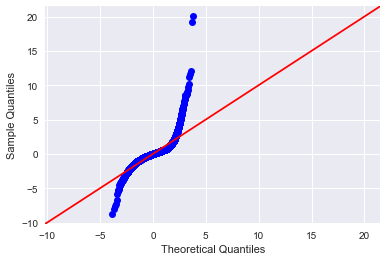

In [80]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [81]:
# Without removing much outliers this looks like a hot mess

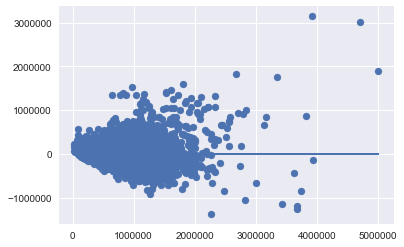

In [82]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

In [83]:
# There seems to be some grouping in a cone shape but it can be clean up 
# significantly to be more accurate

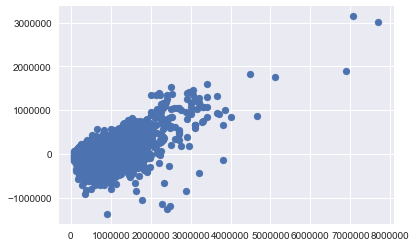

In [84]:
plt.scatter(train['price'], model.resid)
# plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

### Cleaning Outliers

> Looking for any suspicious value in the describe function

In [85]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_basement,yr_built,yr_renovated,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
count,21597.00000,21597.00000,21597.00000,21597.00000,21597.00000,21597.00000,21597.00000,21597.00000,21597.00000,21597.00000,...,21597.00000,21597.00000,21597.00000,21597.00000,21597.00000,21597.00000,21597.00000,21597.00000,21597.00000,21597.00000
mean,540296.57351,3.37320,2.11583,2080.32185,15099.40876,1.49410,0.00676,285.71658,1970.99968,0.03445,...,0.01334,0.00264,0.02065,0.01176,0.01246,0.01181,0.01213,0.00630,0.01296,0.01468
std,367368.14010,0.92630,0.76898,918.10613,41412.63688,0.53968,0.08194,439.81983,29.37523,0.18238,...,0.11471,0.05131,0.14222,0.10781,0.11091,0.10802,0.10947,0.07911,0.11313,0.12026
min,78000.00000,1.00000,0.50000,370.00000,520.00000,1.00000,0.00000,0.00000,1900.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,322000.00000,3.00000,1.75000,1430.00000,5040.00000,1.00000,0.00000,0.00000,1951.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,450000.00000,3.00000,2.25000,1910.00000,7618.00000,1.50000,0.00000,0.00000,1975.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
75%,645000.00000,4.00000,2.50000,2550.00000,10685.00000,2.00000,0.00000,550.00000,1997.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
max,7700000.00000,33.00000,8.00000,13540.00000,1651359.00000,3.50000,1.00000,4820.00000,2015.00000,1.00000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


In [86]:
df.shape

(21597, 94)

In [87]:
# The bedrooms and bathrooms columns seems to have a high max value which 
# can skew the data

> Taking a look at the bedrooms column on a boxplot and then adjust as needed

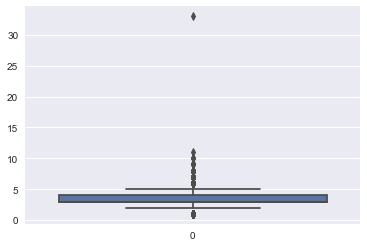

In [88]:
sns.boxplot(data=df['bedrooms'])

In [89]:
df.drop(df[df['bedrooms'] > 5].index, inplace = True)
df.drop(df[df['bedrooms'] < 2].index, inplace = True)

In [90]:
# Checking the changes

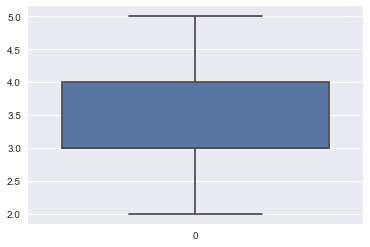

In [91]:
sns.boxplot(data=df['bedrooms'])

In [92]:
df.head(15)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_basement,yr_built,yr_renovated,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.00000,3,1.00000,1180,5650,1.00000,0.00000,0.00000,1955,0,...,0,0,0,0,0,0,1,0,0,0
1,538000.00000,3,2.25000,2570,7242,2.00000,0.00000,400.00000,1951,1,...,0,0,0,0,0,0,0,0,0,0
2,180000.00000,2,1.00000,770,10000,1.00000,0.00000,0.00000,1933,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.00000,4,3.00000,1960,5000,1.00000,0.00000,910.00000,1965,0,...,0,0,0,0,0,0,0,0,0,0
4,510000.00000,3,2.00000,1680,8080,1.00000,0.00000,0.00000,1987,0,...,0,0,0,0,0,0,0,0,0,0
5,1230000.00000,4,4.50000,5420,101930,1.00000,0.00000,1530.00000,2001,0,...,0,0,0,0,0,0,0,0,0,0
6,257500.00000,3,2.25000,1715,6819,2.00000,0.00000,0.00000,1995,0,...,0,0,0,0,0,0,0,0,0,0
7,291850.00000,3,1.50000,1060,9711,1.00000,0.00000,0.00000,1963,0,...,0,0,0,0,0,0,0,0,1,0
8,229500.00000,3,1.00000,1780,7470,1.00000,0.00000,730.00000,1960,0,...,1,0,0,0,0,0,0,0,0,0
9,323000.00000,3,2.50000,1890,6560,2.00000,0.00000,0.00000,2003,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
df.shape

(21067, 94)

In [94]:
df['bedrooms'].value_counts()

3    9824
4    6882
2    2760
5    1601
Name: bedrooms, dtype: int64

> Taking a look at the bathrooms column on a boxplot and then adjust as needed

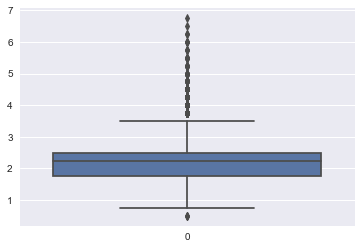

In [95]:
sns.boxplot(data=df['bathrooms'])

In [96]:
df['bathrooms'].value_counts()

2.50000    5343
1.00000    3706
1.75000    3027
2.25000    2025
2.00000    1899
1.50000    1425
2.75000    1148
3.50000     708
3.00000     699
3.25000     575
3.75000     139
4.00000     117
4.50000      72
4.25000      69
0.75000      44
4.75000      18
5.00000      14
5.50000       9
5.25000       9
1.25000       7
6.00000       4
0.50000       3
5.75000       3
6.25000       2
6.50000       1
6.75000       1
Name: bathrooms, dtype: int64

In [97]:
df.drop(df[df['bathrooms'] > 4.5].index, inplace = True)

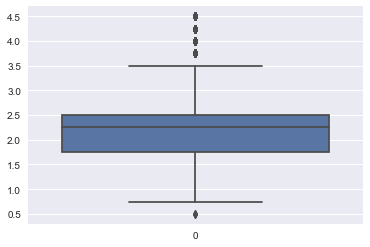

In [98]:
sns.boxplot(data=df['bathrooms'])

In [99]:
# Seeing what changes has been made

In [100]:
df.shape

(21006, 94)

>Checking the floors columns with a value counts function to see the ratios of the floors 

In [101]:
df['floors'].value_counts(normalize=True) * 100

1.00000   49.42873
2.00000   38.20337
1.50000    8.81177
3.00000    2.86109
2.50000    0.66648
3.50000    0.02856
Name: floors, dtype: float64

In [102]:
df.drop(df[df['floors'] == 3.5].index, inplace = True)
df.drop(df[df['floors'] == 2.5].index, inplace = True)

In [103]:
df.shape

(20860, 94)

>Taking a look at the price column to see if we can get rid of some extreme outliers to keep the data from skewing 

In [104]:
df['price'].describe()

count     20860.00000
mean     529601.71807
std      332991.87729
min       78000.00000
25%      320000.00000
50%      450000.00000
75%      635000.00000
max     7060000.00000
Name: price, dtype: float64

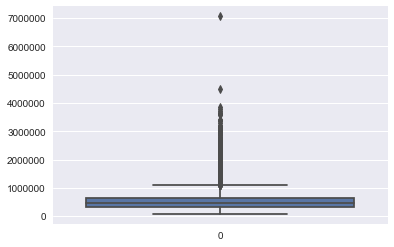

In [105]:
sns.boxplot(data=df['price'])

In [106]:
df.drop(df[df['price'] > 1000000].index, inplace = True)

In [107]:
df.shape

(19569, 94)

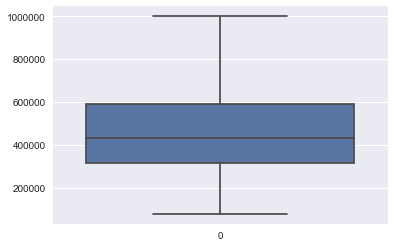

In [108]:
sns.boxplot(data=df['price'])

>Checking out the sqft_living column now

In [109]:
df['sqft_living'].describe()

count   19569.00000
mean     1949.43472
std       737.85035
min       440.00000
25%      1400.00000
50%      1840.00000
75%      2393.00000
max      5710.00000
Name: sqft_living, dtype: float64

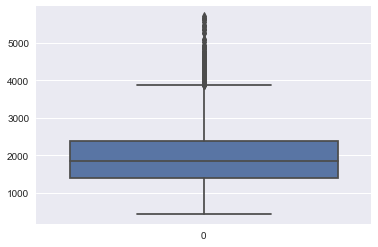

In [110]:
sns.boxplot(data=df['sqft_living'])

In [111]:
df.drop(df[df['sqft_living'] > 3800].index, inplace = True)

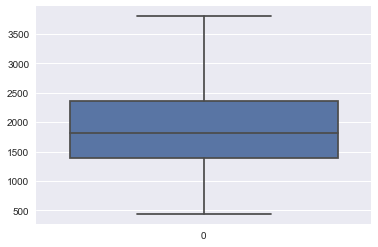

In [112]:
sns.boxplot(data=df['sqft_living'])

In [113]:
df.shape

(19236, 94)

>Taking a look at sqft_lot to see if we can make any adjustment

In [114]:
df['sqft_lot'].describe()

count     19236.00000
mean      13865.78358
std       37771.70127
min         520.00000
25%        5000.00000
50%        7483.00000
75%       10155.00000
max     1651359.00000
Name: sqft_lot, dtype: float64

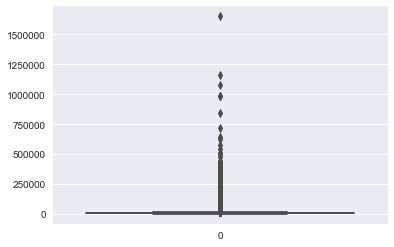

In [115]:
sns.boxplot(data=df['sqft_lot'])

In [116]:
df.drop(df[df['sqft_lot'] > 15000].index, inplace = True)

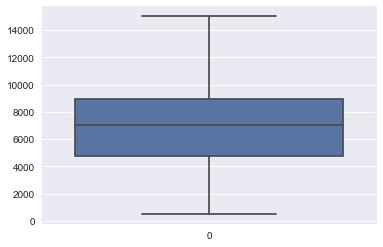

In [117]:
sns.boxplot(data=df['sqft_lot'])

In [118]:
df.shape

(16752, 94)

> Now clean up the sqft_basement 

In [119]:
df['sqft_basement'].describe()

count   16752.00000
mean      243.16135
std       374.66359
min         0.00000
25%         0.00000
50%         0.00000
75%       480.00000
max      1990.00000
Name: sqft_basement, dtype: float64

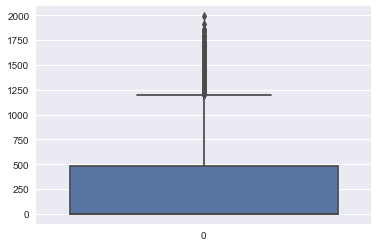

In [120]:
sns.boxplot(data=df['sqft_basement'])

In [121]:
df.drop(df[df['sqft_basement'] > 1000].index, inplace = True)

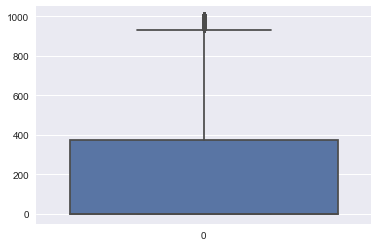

In [122]:
sns.boxplot(data=df['sqft_basement'])

In [123]:
df.shape

(15860, 94)

In [124]:
# Been checking on the df.shape function after each column changes to see how
# data has been removed

### New Model with Removed Outliers

> Going through the whole process of making a linear regression model again

In [125]:
outcome = 'price'
x_cols = list(df.columns)
x_cols.remove(outcome)

In [126]:
train, test = train_test_split(df)

In [127]:
print(len(train), len(test))
train.head()

11895 3965


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_basement,yr_built,yr_renovated,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
6287,236000.00000,3,1.75000,1090,7647,1.00000,0.00000,0.00000,1994,0,...,0,0,0,0,0,0,0,0,0,0
862,539900.00000,3,1.75000,1650,10150,1.00000,0.00000,420.00000,1976,0,...,0,0,0,0,0,0,0,0,0,0
17142,355000.00000,3,1.75000,1120,7740,1.00000,0.00000,260.00000,1948,0,...,0,0,0,0,0,0,0,0,0,0
10425,312000.00000,4,1.00000,1190,7620,1.50000,0.00000,0.00000,1926,0,...,0,0,0,0,0,0,0,0,0,0
11104,629950.00000,3,2.50000,1680,1620,2.00000,0.00000,560.00000,2014,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     646.6
Date:                Fri, 18 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:21:53   Log-Likelihood:            -1.5066e+05
No. Observations:               11895   AIC:                         3.015e+05
Df Residuals:                   11804   BIC:                         3.022e+05
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      9.072e+05   7.86e+04     11.545      0.000    7.53e+05    1.06e+06
bedrooms      -3076.2334   1235.399     -2.490      0.013   -5497.819    -654.648
bathrooms      1.577e+04   1853.295      8.511      0.000    1.21e+04    1.94e+04
sqft_living     128.5499      2.282     56.339      0.000     124.077     133.022
sqft_lot          1.9337      0.347      5.578      0.000       1.254       2.613
floors        -1.498e+04   2228.783     -6.720      0.000   -1.93e+04   -1.06e+04
waterfront     3.627e+05   2.55e+04     14.235      0.000    3.13e+05    4.13e+05
sqft_basement   -31.1588      3.090    -10.082      0.000     -37.217     -25.101
yr_built       -561.5327     43.567    -12.889      0.000    -646.931    -476.134
yr_renovated   3.403e+04   4713.749      7.219      0.000    2.48e+04    4.33e+04
month         -2403.2469    227.012    -10.586      0.000   -2848.228   -1958.266
condition_2    1.213e+05   2.31e+04      5.251      0.000     7.6e+04    1.67e+05
condition_3    1.638e+05   2.16e+04      7.581      0.000    1.21e+05    2.06e+05
condition_4    1.822e+05   2.16e+04      8.429      0.000     1.4e+05    2.25e+05
condition_5    2.063e+05   2.17e+04      9.501      0.000    1.64e+05    2.49e+05
grade_4       -2595.6708   3.19e+04     -0.081      0.935   -6.51e+04    5.99e+04
grade_5         1.95e+04   1.16e+04      1.675      0.094   -3318.310    4.23e+04
grade_6        2.824e+04   1.07e+04      2.645      0.008    7313.186    4.92e+04
grade_7        5.705e+04    1.1e+04      5.201      0.000    3.55e+04    7.86e+04
grade_8        1.034e+05   1.13e+04      9.108      0.000    8.11e+04    1.26e+05
grade_9        1.731e+05   1.18e+04     14.647      0.000     1.5e+05    1.96e+05
grade_10       2.156e+05   1.26e+04     17.047      0.000    1.91e+05     2.4e+05
grade_11       3.129e+05   1.95e+04     16.064      0.000    2.75e+05    3.51e+05
grade_12      -1.716e-09   7.77e-11    -22.084      0.000   -1.87e-09   -1.56e-09
grade_13      -1.112e-10   2.51e-11     -4.431      0.000    -1.6e-10    -6.2e-11
zipcode_98002  1820.2540   8637.099      0.211      0.833   -1.51e+04    1.88e+04
zipcode_98003  2869.8962   8072.166      0.356      0.722    -1.3e+04    1.87e+04
zipcode_98004  5.093e+05   1.07e+04     47.410      0.000    4.88e+05     5.3e+05
zipcode_98005  3.266e+05   1.16e+04     28.229      0.000    3.04e+05    3.49e+05
zipcode_98006  2.707e+05   7902.941     34.258      0.000    2.55e+05    2.86e+05
zipcode_98007  2.458e+05   1.04e+04     23.550      0.000    2.25e+05    2.66e+05
zipcode_98008  2.382e+05   8256.257     28.849      0.000    2.22e+05    2.54e+05
zipcode_98010  7.234e+04   1.48e+04      4.877      0.000    4.33e+04    1.01e+05
zipcode_98011   1.52e+05   9173.263     16.567      0.000    1.34e+05     1.7e+05
zipcode_98014  9.219e+04   1.81e+04      5.080   

In [129]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

94 83
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,9.072e+05,7.86e+04,11.545,0.00000,7.53e+05,1.06e+06
bedrooms,-3076.2334,1235.399,-2.490,0.01300,-5497.819,-654.648
bathrooms,1.577e+04,1853.295,8.511,0.00000,1.21e+04,1.94e+04
sqft_living,128.5499,2.282,56.339,0.00000,124.077,133.022
sqft_lot,1.9337,0.347,5.578,0.00000,1.254,2.613


In [130]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     718.6
Date:                Fri, 18 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:21:53   Log-Likelihood:            -1.5067e+05
No. Observations:               11895   AIC:                         3.015e+05
Df Residuals:                   11813   BIC:                         3.021e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      9.269e+05   8.69e+04     10.670      0.000    7.57e+05     1.1e+06
bedrooms      -3097.9204   1233.995     -2.510      0.012   -5516.753    -679.088
bathrooms       1.58e+04   1851.506      8.533      0.000    1.22e+04    1.94e+04
sqft_living     128.6047      2.278     56.447      0.000     124.139     133.071
sqft_lot          1.9380      0.345      5.612      0.000       1.261       2.615
floors        -1.496e+04   2225.805     -6.722      0.000   -1.93e+04   -1.06e+04
waterfront     3.702e+05   2.47e+04     15.015      0.000    3.22e+05    4.19e+05
sqft_basement   -31.1213      3.082    -10.097      0.000     -37.163     -25.080
yr_built       -559.5673     43.448    -12.879      0.000    -644.732    -474.403
yr_renovated   3.387e+04   4707.918      7.195      0.000    2.46e+04    4.31e+04
month         -2401.0640    226.875    -10.583      0.000   -2845.776   -1956.352
condition_2    1.217e+05   2.31e+04      5.276      0.000    7.65e+04    1.67e+05
condition_3    1.641e+05   2.16e+04      7.596      0.000    1.22e+05    2.06e+05
condition_4    1.825e+05   2.16e+04      8.448      0.000     1.4e+05    2.25e+05
condition_5    2.067e+05   2.17e+04      9.524      0.000    1.64e+05    2.49e+05
grade_6        9715.7725   7307.413      1.330      0.184   -4607.961     2.4e+04
grade_7        3.856e+04   7254.147      5.316      0.000    2.43e+04    5.28e+04
grade_8        8.484e+04   7605.652     11.155      0.000    6.99e+04    9.98e+04
grade_9        1.546e+05   8224.130     18.796      0.000    1.38e+05    1.71e+05
grade_10        1.97e+05   9615.097     20.493      0.000    1.78e+05    2.16e+05
grade_11       2.943e+05   1.94e+04     15.201      0.000    2.56e+05    3.32e+05
grade_12       5.738e-08    3.4e-09     16.872      0.000    5.07e-08     6.4e-08
grade_13       2.793e-08   1.65e-09     16.965      0.000    2.47e-08    3.12e-08
zipcode_98004  5.038e+05   9363.539     53.803      0.000    4.85e+05    5.22e+05
zipcode_98005   3.21e+05   1.03e+04     31.174      0.000    3.01e+05    3.41e+05
zipcode_98006  2.651e+05   5892.183     45.000      0.000    2.54e+05    2.77e+05
zipcode_98007  2.403e+05   9008.758     26.676      0.000    2.23e+05    2.58e+05
zipcode_98008  2.327e+05   6352.079     36.631      0.000     2.2e+05    2.45e+05
zipcode_98010  6.635e+04   1.38e+04      4.792      0.000    3.92e+04    9.35e+04
zipcode_98011  1.464e+05   7535.647     19.432      0.000    1.32e+05    1.61e+05
zipcode_98014  8.675e+04   1.74e+04      4.994      0.000    5.27e+04    1.21e+05
zipcode_98019  8.993e+04   8292.875     10.844      0.000    7.37e+04    1.06e+05
zipcode_98023 -2.383e+04   4807.373     -4.956      0.000   -3.33e+04   -1.44e+04
zipcode_98024  1.304e+05   2.24e+04      5.834      0.000    8.66e+04    1.74e+05
zipcode_98027  2.244e+05   6560.608     34.204   

In [131]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [132]:
model.params.sort_values().tail(20)

zipcode_98116   283971.58634
grade_11        294330.42683
zipcode_98117   303040.40563
zipcode_98115   303356.84611
zipcode_98033   307209.16408
zipcode_98122   308140.42554
zipcode_98103   314116.15552
zipcode_98107   315936.81386
zipcode_98005   321025.04722
zipcode_98199   341490.68595
zipcode_98105   365392.41861
waterfront      370174.65480
zipcode_98102   386455.96678
zipcode_98119   395095.99026
zipcode_98112   399575.33050
zipcode_98109   400671.80608
zipcode_98040   413664.51345
zipcode_98004   503789.28590
zipcode_98039   638309.78298
Intercept       926901.57719
dtype: float64

In [133]:
model.params['yr_renovated']

33873.56351154315

In [134]:
model.pvalues[model.pvalues > 0.05]

grade_6   0.18368
dtype: float64

In [135]:
# df.drop(df[df['zipcode_98070']].index, inplace = True, axis=1)

In [136]:
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     718.6
Date:                Fri, 18 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:21:54   Log-Likelihood:            -1.5067e+05
No. Observations:               11895   AIC:                         3.015e+05
Df Residuals:                   11813   BIC:                         3.021e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      9.269e+05   8.69e+04     10.670      0.000    7.57e+05     1.1e+06
bedrooms      -3097.9204   1233.995     -2.510      0.012   -5516.753    -679.088
bathrooms       1.58e+04   1851.506      8.533      0.000    1.22e+04    1.94e+04
sqft_living     128.6047      2.278     56.447      0.000     124.139     133.071
sqft_lot          1.9380      0.345      5.612      0.000       1.261       2.615
floors        -1.496e+04   2225.805     -6.722      0.000   -1.93e+04   -1.06e+04
waterfront     3.702e+05   2.47e+04     15.015      0.000    3.22e+05    4.19e+05
sqft_basement   -31.1213      3.082    -10.097      0.000     -37.163     -25.080
yr_built       -559.5673     43.448    -12.879      0.000    -644.732    -474.403
yr_renovated   3.387e+04   4707.918      7.195      0.000    2.46e+04    4.31e+04
month         -2401.0640    226.875    -10.583      0.000   -2845.776   -1956.352
condition_2    1.217e+05   2.31e+04      5.276      0.000    7.65e+04    1.67e+05
condition_3    1.641e+05   2.16e+04      7.596      0.000    1.22e+05    2.06e+05
condition_4    1.825e+05   2.16e+04      8.448      0.000     1.4e+05    2.25e+05
condition_5    2.067e+05   2.17e+04      9.524      0.000    1.64e+05    2.49e+05
grade_6        9715.7725   7307.413      1.330      0.184   -4607.961     2.4e+04
grade_7        3.856e+04   7254.147      5.316      0.000    2.43e+04    5.28e+04
grade_8        8.484e+04   7605.652     11.155      0.000    6.99e+04    9.98e+04
grade_9        1.546e+05   8224.130     18.796      0.000    1.38e+05    1.71e+05
grade_10        1.97e+05   9615.097     20.493      0.000    1.78e+05    2.16e+05
grade_11       2.943e+05   1.94e+04     15.201      0.000    2.56e+05    3.32e+05
grade_12       5.738e-08    3.4e-09     16.872      0.000    5.07e-08     6.4e-08
grade_13       2.793e-08   1.65e-09     16.965      0.000    2.47e-08    3.12e-08
zipcode_98004  5.038e+05   9363.539     53.803      0.000    4.85e+05    5.22e+05
zipcode_98005   3.21e+05   1.03e+04     31.174      0.000    3.01e+05    3.41e+05
zipcode_98006  2.651e+05   5892.183     45.000      0.000    2.54e+05    2.77e+05
zipcode_98007  2.403e+05   9008.758     26.676      0.000    2.23e+05    2.58e+05
zipcode_98008  2.327e+05   6352.079     36.631      0.000     2.2e+05    2.45e+05
zipcode_98010  6.635e+04   1.38e+04      4.792      0.000    3.92e+04    9.35e+04
zipcode_98011  1.464e+05   7535.647     19.432      0.000    1.32e+05    1.61e+05
zipcode_98014  8.675e+04   1.74e+04      4.994      0.000    5.27e+04    1.21e+05
zipcode_98019  8.993e+04   8292.875     10.844      0.000    7.37e+04    1.06e+05
zipcode_98023 -2.383e+04   4807.373     -4.956      0.000   -3.33e+04   -1.44e+04
zipcode_98024  1.304e+05   2.24e+04      5.834      0.000    8.66e+04    1.74e+05
zipcode_98027  2.244e+05   6560.608     34.204   

In [137]:
X = df[x_cols]
X = sm.add_constant(X)
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


[('bedrooms', 15401.231341594697),
 ('bathrooms', 1.7787303146472873),
 ('sqft_living', 3.11833231412087),
 ('sqft_lot', 4.190828842293742),
 ('floors', 2.253947980032296),
 ('waterfront', 2.9467234242043756),
 ('sqft_basement', 1.015347283170496),
 ('yr_built', 1.735571201649288),
 ('yr_renovated', 3.4807511739645705),
 ('month', 1.1101090210612135),
 ('condition_2', 1.0070133201653926),
 ('condition_3', 8.251460914979823),
 ('condition_4', 226.94957793805875),
 ('condition_5', 192.12076012488097),
 ('grade_6', 71.39804436260002),
 ('grade_7', 10.662573313197587),
 ('grade_8', 26.925804921394803),
 ('grade_9', 24.168650060473823),
 ('grade_10', 11.873110490996812),
 ('grade_11', 3.8649850424659573),
 ('grade_12', 1.2591571132534545),
 ('grade_13', nan),
 ('zipcode_98004', nan),
 ('zipcode_98005', 1.0624040138662234),
 ('zipcode_98006', 1.0533675372769526),
 ('zipcode_98007', 1.179778113070397),
 ('zipcode_98008', 1.0617336549205747),
 ('zipcode_98010', 1.1224565190829274),
 ('zipcode_

In [138]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x, vif in vif_scores if vif < 6]
print(len(vif_scores), len(x_cols))

83 72


In [139]:
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     523.7
Date:                Fri, 18 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:22:00   Log-Likelihood:            -1.5279e+05
No. Observations:               11895   AIC:                         3.057e+05
Df Residuals:                   11823   BIC:                         3.063e+05
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       7.53e+05   8.95e+04      8.409      0.000    5.77e+05    9.29e+05
bathrooms      1.821e+04   2160.691      8.427      0.000     1.4e+04    2.24e+04
sqft_living     163.5635      2.165     75.548      0.000     159.320     167.807
sqft_lot          3.3488      0.409      8.194      0.000       2.548       4.150
floors        -9932.8644   2647.261     -3.752      0.000   -1.51e+04   -4743.798
waterfront     3.414e+05   2.93e+04     11.642      0.000    2.84e+05    3.99e+05
sqft_basement   -44.0751      3.593    -12.267      0.000     -51.118     -37.032
yr_built       -392.0964     45.988     -8.526      0.000    -482.240    -301.953
yr_renovated   3.198e+04   5545.965      5.767      0.000    2.11e+04    4.29e+04
month         -2198.9179    271.020     -8.113      0.000   -2730.162   -1667.674
condition_2   -5.593e+04      1e+04     -5.571      0.000   -7.56e+04   -3.62e+04
grade_11       1.464e+05   2.09e+04      7.008      0.000    1.05e+05    1.87e+05
grade_12      -8.994e-09   7.04e-09     -1.277      0.202   -2.28e-08    4.81e-09
zipcode_98005  3.217e+05   1.23e+04     26.254      0.000    2.98e+05    3.46e+05
zipcode_98006  2.762e+05   6921.487     39.903      0.000    2.63e+05     2.9e+05
zipcode_98007  2.409e+05   1.07e+04     22.501      0.000     2.2e+05    2.62e+05
zipcode_98008  2.216e+05   7532.201     29.422      0.000    2.07e+05    2.36e+05
zipcode_98010  3.547e+04   1.65e+04      2.154      0.031    3193.387    6.77e+04
zipcode_98011  1.252e+05   8969.425     13.959      0.000    1.08e+05    1.43e+05
zipcode_98014  5.728e+04   2.07e+04      2.762      0.006    1.66e+04    9.79e+04
zipcode_98019  4.752e+04   9876.300      4.811      0.000    2.82e+04    6.69e+04
zipcode_98023 -4.242e+04   5698.284     -7.445      0.000   -5.36e+04   -3.13e+04
zipcode_98024  1.024e+05   2.67e+04      3.838      0.000    5.01e+04    1.55e+05
zipcode_98027  2.183e+05   7774.249     28.080      0.000    2.03e+05    2.34e+05
zipcode_98028  1.117e+05   7743.504     14.430      0.000    9.66e+04    1.27e+05
zipcode_98029  2.253e+05   6708.827     33.583      0.000    2.12e+05    2.38e+05
zipcode_98033  2.977e+05   6603.749     45.086      0.000    2.85e+05    3.11e+05
zipcode_98034  1.584e+05   5576.057     28.416      0.000    1.48e+05    1.69e+05
zipcode_98038    73.6191   5460.185      0.013      0.989   -1.06e+04    1.08e+04
zipcode_98039  6.329e+05   4.61e+04     13.739      0.000    5.43e+05    7.23e+05
zipcode_98040  4.292e+05   1.15e+04     37.418      0.000    4.07e+05    4.52e+05
zipcode_98045   6.19e+04   9553.390      6.479      0.000    4.32e+04    8.06e+04
zipcode_98052  2.422e+05   5661.640     42.785      0.000    2.31e+05    2.53e+05
zipcode_98053  2.267e+05   7552.323     30.022      0.000    2.12e+05    2.42e+05
zipcode_98055  1.022e+04   7192.872      1.420   

### New Normality and Homoscedasticity Assumption

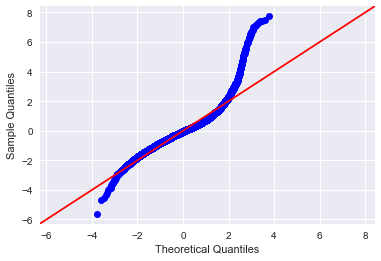

In [140]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [141]:
# The QQ plot looks much better than the original, will still need
# some more work 

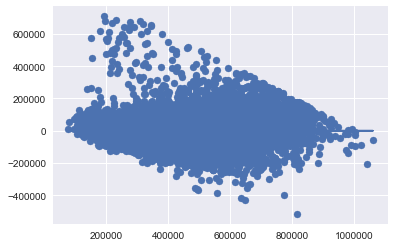

In [142]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

In [143]:
# The homoscedsticity looks better as well, tighter grouping, however
# it still could use some more work

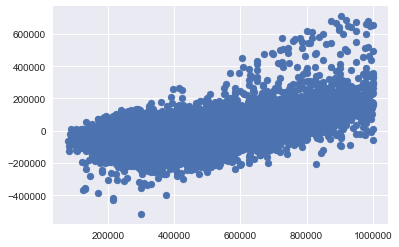

In [144]:
plt.scatter(train['price'], model.resid)

In [145]:
# More consist plotting with some stragglers once again better, but could 
# use more work

## INTERPRET

### What factors(columns) boost the overall value of the house?

> We'll take a look at the coefficient to see what are some important factors in potentially raising the house value for the seller 

In [146]:
model.params.sort_values().tail(60)

zipcode_98168      488.57890
zipcode_98058     7870.92051
zipcode_98148     9209.54187
zipcode_98055    10215.72574
bathrooms        18208.22092
zipcode_98178    19932.93677
yr_renovated     31984.34104
zipcode_98010    35471.69136
zipcode_98019    47515.41105
zipcode_98014    57281.75187
zipcode_98045    61896.64489
zipcode_98059    63050.22418
zipcode_98146    64001.38135
zipcode_98166    65973.37264
zipcode_98056    84160.46308
zipcode_98106    87018.83264
zipcode_98108    91431.44310
zipcode_98065   100059.86789
zipcode_98024   102446.12443
zipcode_98155   107725.81327
zipcode_98028   111736.54818
zipcode_98011   125203.30769
zipcode_98072   128159.10623
zipcode_98133   131462.22722
zipcode_98077   133768.79190
zipcode_98118   134347.10198
grade_11        146397.15309
zipcode_98034   158447.83198
zipcode_98125   166115.18530
zipcode_98126   177520.80808
zipcode_98177   186416.84387
zipcode_98074   208823.66988
zipcode_98027   218304.28003
zipcode_98008   221612.58921
zipcode_98144 

In [147]:
model.params['yr_renovated']

31984.341036521677

In [148]:
model.params['bathrooms']

18208.220915910297

In [149]:
model.params['month']

-2198.9179435601973

> The majority of the house's value is going to come from the location. Also having a waterfront property does increase the overall value of the house. We can call these factors the uncontrollable, meaning you cannot change these factor unless you were to move the entire house to a new location which is an expensive thing to be doing assuming you can find a space for it.

> Looking at some coefficient that we can control would be the 'yr_renovated' and 'bathrooms'. It is possible to increase the value of the house by updating the house itself and adding a half bathroom for an example. 

### Does the time of year have an impact on value when selling a house?

In [150]:
sns.set(style = 'darkgrid')

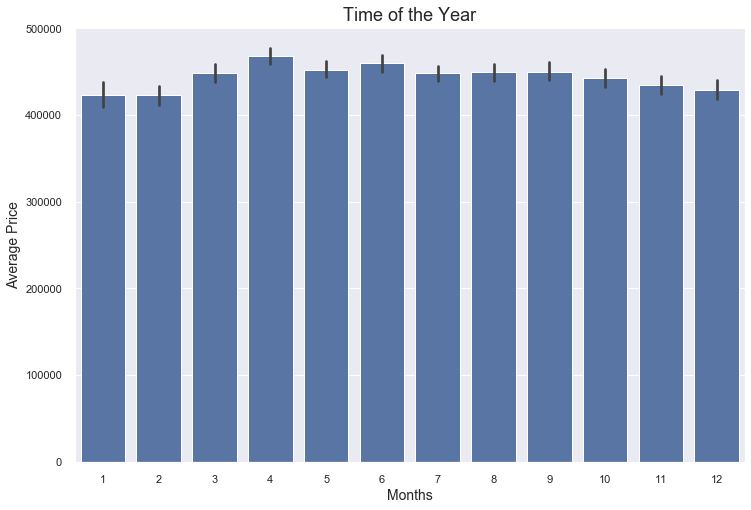

In [151]:
f, ax = plt.subplots(figsize = (12, 8))
sns.barplot(y= 'price', x= 'month',
               data = df, ax=ax, color = 'b')
ax.set_title('Time of the Year', fontsize = 18)
ax.set_ylabel('Average Price', fontsize = 14)
ax.set_xlabel('Months', fontsize = 14);

> There is a slight increase in value of the house when selling it in spring time and a decrease in value during the winter time. 

### Does the number of bathrooms affect the price of the house?

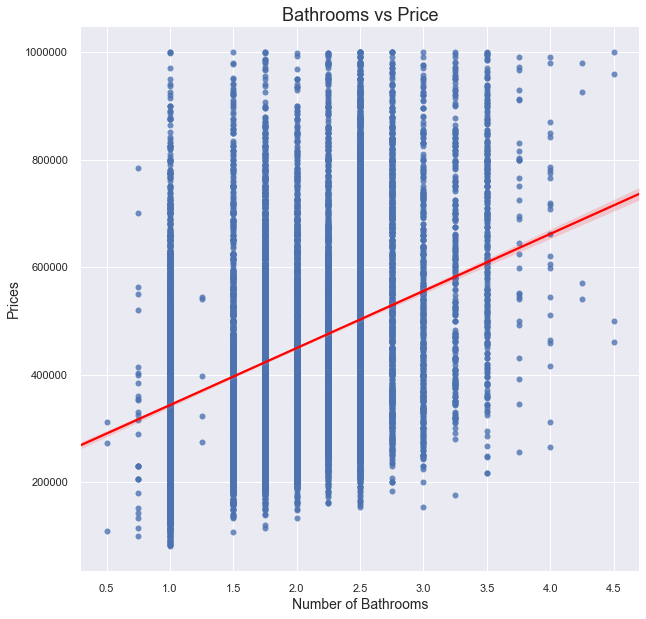

In [155]:
# Making a scatter plot using seaborn
f, ax = plt.subplots(figsize=(10, 10))
sns.despine(f, left=True, bottom=True)
# Included a red line to show correlation between bathrooms and price
sns.regplot(x= 'bathrooms', y= 'price',
                data=df, ax=ax, line_kws = {'color':'red'})
sns.set(style = 'darkgrid')
ax.set_xlabel('Number of Bathrooms', fontsize = 14)
ax.set_ylabel('Prices', fontsize = 14)
ax.set_title ('Bathrooms vs Price', fontsize = 18);

> There is a bit of a significant increase in house's value by adding on bathroom by the quarters. The four key components to a bathroom are sink, toilet, shower, and a bathtub.

### Does renovation increase the value of the house?

In [153]:
df['yr_renovated'] = df['yr_renovated'].astype(bool)

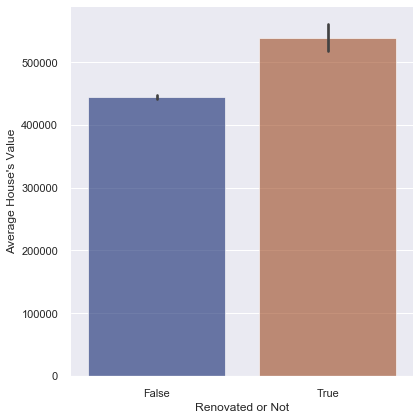

In [154]:
renovated = sns.catplot(
    data=df, kind="bar",
    x="yr_renovated", y="price",
    palette="dark", alpha=.6, height=6)
renovated.despine(left=True)

renovated.set_axis_labels("Renovated or Not", "Average House's Value");

> This is taking a look to see how much of an increase in house's value by renovating your house.

### Conclusion

The controllable to look at when selling a house are the time of the year, number of bathrooms, and renovation. The reason that they are controllable is because the seller can take advantage of these features to increase the overall value of the house. When it time to sell a house you can gain a slight increase in value when selling it in the Spring season, try not to sell it during the Winter season because that is where the value at the lowest. It's a good idea to add on a half bathroom in the house if there is space for it, because it can increase the value of the house a reasonable amount. Also renovation is a great idea when selling a house, because it updates the rooms, appliances, etc. to a more modern standard which in turn increase the value of the house. These three features should be taken into consideration when selling a property if one wish to maximize their profits. 